In [ ]:
#!git clone https://github.com/Marlup/Simulation-of-investment-and-compound-returns.git

In [1]:
# data processing
import numpy as np
import pandas as pd
# pyplot
from matplotlib import pyplot as plt
# seaborn
import seaborn as sns
# bokeh
from bokeh import plotting as bk
from bokeh.models import Span
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
import os
output_notebook()

# Compound utils
from compound import (
    get_compound_return,
    simulate_compound_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    define_scenario,
    plot_scenario_bokeh
)

Loading BokehJS ...

In [2]:
CURRENCY = "€"

In [3]:
os.chdir("./Simulation-of-investment-and-compound-returns")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: './Simulation-of-investment-and-compound-returns'

In [ ]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

### Calculation of composed return. Composed return function

In [ ]:
# Calculation of composed return. Composed return function
principal_amount = 10_000
annual_contribution = 200 * 12
roi = 0.075
years = 30
compounding_frequency = 12

periodic_contribution = annual_contribution / compounding_frequency

amount, accum_roi = get_compound_return(
    principal_amount,
    roi,
    compounding_frequency,
    periodic_contribution,
    years,
    True
    )
print(f"Total amount {amount}")
print(f"Accumulated roi {accum_roi}")

### Estimation of composed return. Simulation

Scenario

In [5]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 15000 # @param {type:"number", "min": 0.0, "max": 1.0e8}
monthly_contribution = 200 # @param {type:"number", "min": 0.0, "max": 1.0e8}
annual_contribution = monthly_contribution * 12
inc_contribution_rate = 0.02
annual_roi = 0.06 # @param {type:"number", "min": 0.0, "max": 1.0}
duration = 60 # @param {type:"slider", "min": 0.0, "max": 150, "step": 1}
retirement_at = 30 # @param {type:"slider", "min": 0, "max": 150, "step": 1}
monthly_retirement_income = 1000 # @param {type:"number", "min": 0.0, "max": 1.0e4}
inflation_rate = 0.03
tax_rate = 0.25
 # Compounding once per year
compounding_frequency = 12 # @param {type:"slider", "min": 0, "max": 24, "step": 1}

# Calculate the total balance and earnings using the updated function
total_balance, info = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    compounding_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=duration,
    retirement_at=retirement_at,
    monthly_retirement_income=monthly_retirement_income,
    inflation_rate=inflation_rate,
    tax_rate=tax_rate,
    return_time_yields=True
)

balances = info['balances']
earnings = info['earnings']

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print(f"Total balance after {duration} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings,
                                             balances)

_ , _= bk.show(renderer_e), bk.show(renderer_b)

Max monthly contribution 364.24179584733463
Total balance after 60 years: -158019.9
Total earnings: 878267.01


In [6]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
terms = (1, 6, 12)
virtual_returns = np.arange(0.06, 0.1, 0.01)
yearly_contributions = list(map(lambda x: 12 * x, range(50, 500, 50)))
inc_contributions = [0.01, 0.03, 0.05, 0.1]
years_of_investment = [31, 40, 50, 60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.02, 0.03, 0.04]#np.arange(30, 30 + 5, 5)
retirement_years = 30
monthly_retirement_incomes = [
    0.5e3,
    1.0e3,
    1.5e3,
    2.0e3
    ]
tax_rate = 0.25
retirement_contribution_rate = 0.1

results = define_scenario(initial_amounts,
                          virtual_returns,
                          years_of_investment,
                          terms,
                          yearly_contributions,
                          inc_contributions,
                          inflation_rates,
                          monthly_retirement_incomes,
                          retirement_years,
                          tax_rate
                          )

df = build_dataframe(results)
df

Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552
Max monthly contribution 991.8699686650255
Max monthly contribution 67.48450897201415
Max monthly contribution 122.84211057478412
Max monthly contribution 223.38721570030552

initial_amount   roi  duration  term  contribution  inc_contribution  \
0                 5000  0.06        31     1           600              0.01   
1                 5000  0.06        31     1           600              0.03   
2                 5000  0.06        31     1           600              0.05   
3                 5000  0.06        31     1           600              0.10   
4                 5000  0.06        31     1           600              0.01   
...                ...   ...       ...   ...           ...               ...   
103675           20000  0.10        60    12          5400              0.10   
103676           20000  0.10        60    12          5400              0.01   
103677           20000  0.10        60    12          5400              0.03   
103678           20000  0.10        60    12          5400              0.05   
103679           20000  0.10        60    12          5400              0.10   

        inflation_rate  monthly_retirement_income  total_amount  
0                 0.02                      500.0  5.181770e+04  
1                 0.02                      500.0  6.441515e+04  
2                 0.02                      500.0  8.298608e+04  
3                 0.02                      500.0  1.830270e+05  
4                 0.02                     1000.0  4.577086e+04  
...                ...                        ...           ...  
103675            0.04                     1500.0  9.040987e+06  
103676            0.04                     2000.0  1.259727e+06  
103677            0.04                     2000.0  1.987625e+06  
103678            0.04                     2000.0  3.042541e+06  
103679            0.04                     2000.0  8.562840e+06  

[103680 rows x 9 columns]

In [7]:
# Filter cases
initial_amounts = (10_000, 15_000)
max_roi = 0.1
max_term = 12
contributions = (1200, 3800)
#inc_contributions = (0.01, 0.1)
min_years = 60
monthly_retirement_incomes = (500, 2000)
inflation_rates = (0.02, 0.04)

df_positive = df[df["total_amount"] > 0.0]
# Round up 'total_amount'
df_positive["total_amount"] = df_positive["total_amount"].round(1)
print('Cases with positive amount:', df_positive.shape)

# Filter by example case
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["term"] <= max_term) & \
                      (df_positive["contribution"].between(contributions[0], contributions[1])) & \
                      #(df_positive["inc_contribution"].between(inc_contributions[0], inc_contributions[1])) & \
                      (df_positive["duration"] >= min_years) & \
                      (df_positive["monthly_retirement_income"].between(monthly_retirement_incomes[0], monthly_retirement_incomes[1])) & \
                      ((df_positive["inflation_rate"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["roi", "term", "total_amount", "monthly_retirement_income", "contribution"],
                                    ascending=[True, True, False, False, False])
df_case

Cases with positive amount: (89950, 9)


C:\Users\marsu\AppData\Local\Temp\ipykernel_10504\1881860616.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["total_amount"] = df_positive["total_amount"].round(1)


initial_amount   roi  duration  term  contribution  inc_contribution  \
55971           15000  0.06        60     1          3600              0.10   
30051           10000  0.06        60     1          3600              0.10   
55975           15000  0.06        60     1          3600              0.10   
30055           10000  0.06        60     1          3600              0.10   
55923           15000  0.06        60     1          3000              0.10   
...               ...   ...       ...   ...           ...               ...   
77388           15000  0.10        60    12          1200              0.01   
51493           10000  0.10        60    12          1200              0.03   
77412           15000  0.10        60    12          1200              0.01   
51580           10000  0.10        60    12          2400              0.01   
51592           10000  0.10        60    12          2400              0.01   

       inflation_rate  monthly_retirement_income  total_amount  
55971            0.02                      500.0     3113948.0  
30051            0.02                      500.0     3058673.6  
55975            0.02                     1000.0     2769894.3  
30055            0.02                     1000.0     2714619.9  
55923            0.02                      500.0     2565251.6  
...               ...                        ...           ...  
77388            0.02                     2000.0       71350.7  
51493            0.04                     1000.0       71220.3  
77412            0.04                     1000.0       54186.0  
51580            0.03                     2000.0       54036.5  
51592            0.04                     1500.0        7636.4  

[5170 rows x 9 columns]

## Investor cases

The financial outcomes the investor want

In [8]:
case_ini_amount = 10_000
case_years = 60

case_monthly_contribution = 200
case_annual_contribution = case_monthly_contribution * MONTHS_IN_YEAR
retir_income = 1000

In [9]:
three_cases = df[(df["initial_amount"] == case_ini_amount) & \
                 (df["duration"] == case_years) & \
                 (df["contribution"] == case_annual_contribution) & \
                 (df["monthly_retirement_income"] == retir_income)
                ]
three_cases.head()

initial_amount   roi  duration  term  contribution  inc_contribution  \
29956           10000  0.06        60     1          2400              0.01   
29957           10000  0.06        60     1          2400              0.03   
29958           10000  0.06        60     1          2400              0.05   
29959           10000  0.06        60     1          2400              0.10   
29972           10000  0.06        60     1          2400              0.01   

       inflation_rate  monthly_retirement_income  total_amount  
29956            0.02                     1000.0 -5.180071e+04  
29957            0.02                     1000.0  1.016691e+05  
29958            0.02                     1000.0  3.389584e+05  
29959            0.02                     1000.0  1.617227e+06  
29972            0.03                     1000.0 -1.280015e+05

Three cases

Pesimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 1 % yearly contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 4 % mean inflation rate

Number of cases: 5


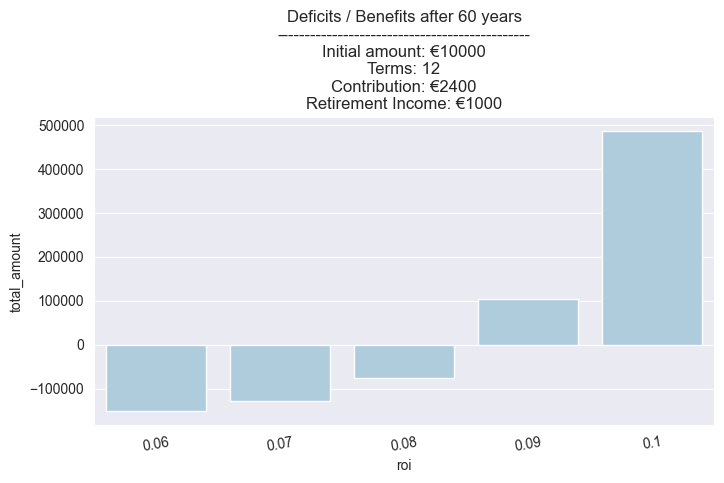

In [10]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.04

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Moderated case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 3 % yearly contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 3 % mean inflation rate

Number of cases: 5


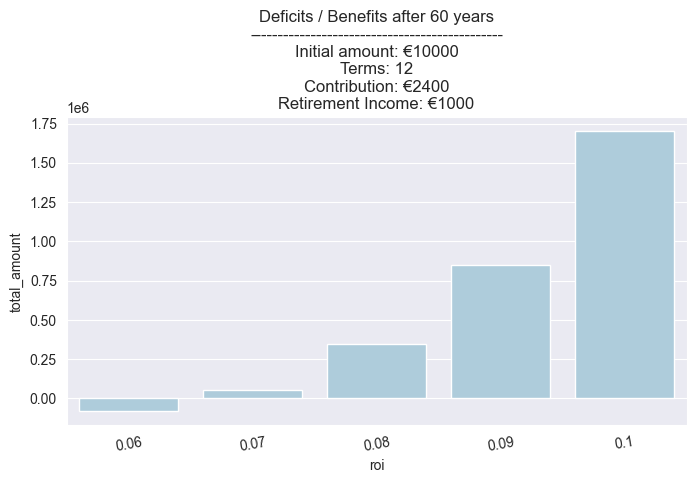

In [11]:
case_terms = 12
inc_contribution = 0.03
inflation_rate = 0.03

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Optimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 5 % yearly contribution increment
- €1,000 of retirement income
- 10 % of retirement income to contribution
- 2 % mean inflation rate

Number of cases: 5


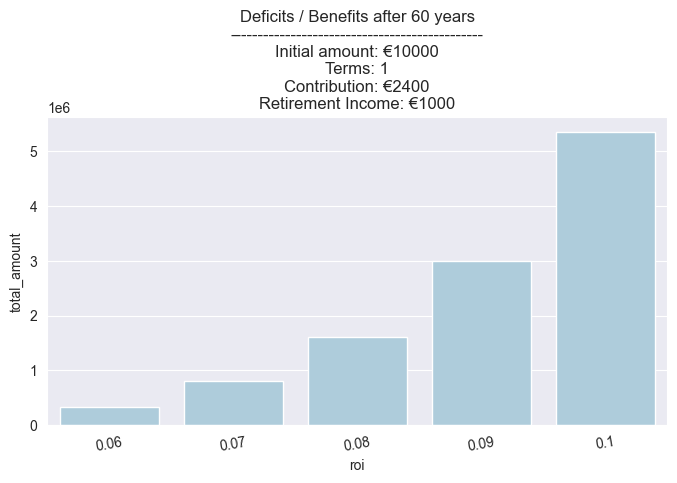

In [13]:
case_terms = 1
inc_contribution = 0.05
inflation_rate = 0.02

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)